# Аналіз зменшення розмірності та графік втрати інформації

## Завдання:
1. Побудувати графік втрати інформації при зменшенні розмірності.
2. Знайти за графіком кількість компонентів, при якій втрачається не більше 30% інформації.

### Імпорт бібліотек

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Завантаження даних

In [35]:
# Прочитаємо дані
df = pd.read_csv('south+german+credit+update/SouthGermanCredit.asc', sep='\\s+')

# Огляд даних
print("Перших кілька рядків даних:")
print(df.head())
print("Інформація про дані:")
print(df.info())

Перших кілька рядків даних:
   laufkont  laufzeit  moral  verw  hoehe  sparkont  beszeit  rate  famges  \
0         1        18      4     2   1049         1        2     4       2   
1         1         9      4     0   2799         1        3     2       3   
2         2        12      2     9    841         2        4     2       2   
3         1        12      4     0   2122         1        3     3       3   
4         1        12      4     0   2171         1        3     4       3   

   buerge  ...  verm  alter  weitkred  wohn  bishkred  beruf  pers  telef  \
0       1  ...     2     21         3     1         1      3     2      1   
1       1  ...     1     36         3     1         2      3     1      1   
2       1  ...     1     23         3     1         1      2     2      1   
3       1  ...     1     39         3     1         2      2     1      1   
4       1  ...     2     38         1     2         2      2     2      1   

   gastarb  kredit  
0        2       1 

### Попередня обробка даних

In [36]:
# Масштабування даних для коректної роботи PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

### Проведення PCA

PCA (Principal Component Analysis) — це метод зменшення розмірності даних, який перетворює вихідні ознаки на нові, ортогональні компоненти, що пояснюють максимальну варіацію в даних. Він допомагає усунути кореляцію між ознаками та зменшити кількість вимірів, зберігаючи якомога більше інформації. Головна мета PCA — спростити аналіз даних, зменшивши розмірність без значної втрати інформативності.

In [37]:
# Застосування PCA
pca = PCA()
pca.fit(scaled_data)

# Отримання поясненої дисперсії (explained variance ratio)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Виведення поясненої дисперсії
# Дисперсія — це статистична міра, яка показує, наскільки дані розкидані навколо середнього значення. 
# Вона відображає ступінь варіації або розмаху даних у вибірці.
print("Пояснена дисперсія для кожного компоненту:")
print(explained_variance_ratio)

Пояснена дисперсія для кожного компоненту:
[0.12157518 0.10247799 0.07079505 0.06383366 0.05855806 0.05740068
 0.05451232 0.05182615 0.04767885 0.0437363  0.04164017 0.03896215
 0.03749237 0.03619061 0.0331466  0.03034508 0.0274295  0.02522312
 0.02273072 0.02207129 0.01237415]


### Побудова графіка втрати інформації

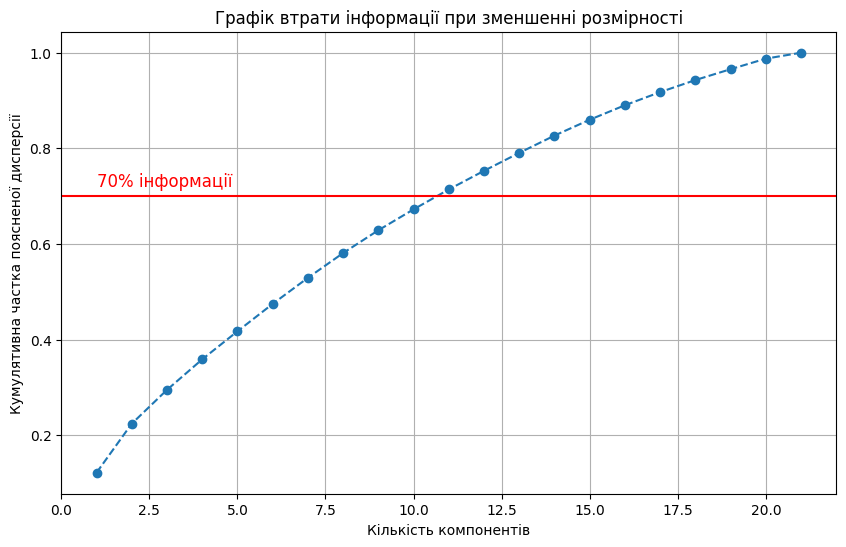

In [38]:
# Побудова графіка кумулятивної дисперсії
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.title('Графік втрати інформації при зменшенні розмірності')
plt.xlabel('Кількість компонентів')
plt.ylabel('Кумулятивна частка поясненої дисперсії')
plt.axhline(y=0.7, color='r', linestyle='-')
plt.text(1, 0.72, '70% інформації', color='red', fontsize=12)
plt.grid()
plt.show()

### Пошук кількості компонентів для 70% інформації

In [39]:
# Знайти кількість компонентів, які пояснюють не менше 70% інформації
components_70 = np.argmax(cumulative_variance_ratio >= 0.7) + 1
print(f"Кількість компонентів для збереження не менше 70% інформації: {components_70}")

Кількість компонентів для збереження не менше 70% інформації: 11


###  Графік індивідуальної дисперсії кожної компоненти

Цей графік показує, яку частку варіації пояснює кожна головна компонента. Він допоможе оцінити внесок кожної компоненти у загальну структуру даних.

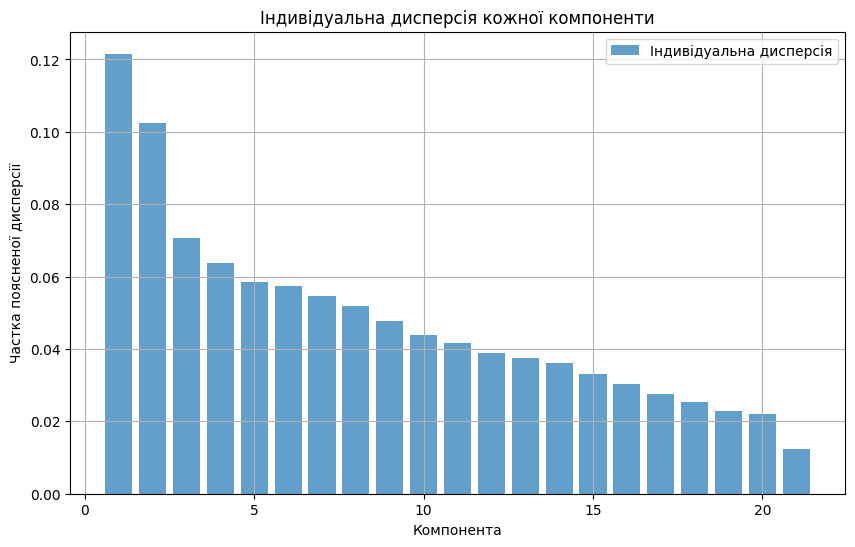

In [40]:
# Графік індивідуальної дисперсії
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, label='Індивідуальна дисперсія')
plt.title('Індивідуальна дисперсія кожної компоненти')
plt.xlabel('Компонента')
plt.ylabel('Частка поясненої дисперсії')
plt.legend()
plt.grid()
plt.show()


### Скорочення розмірності даних до 2D для візуалізації

Якщо зменшити розмірність до 2 головних компонент, можна візуалізувати дані в двовимірному просторі.

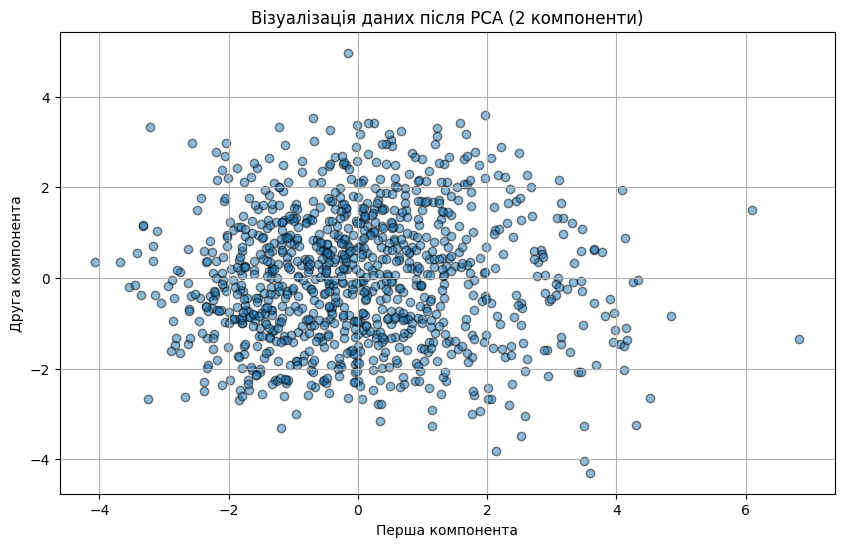

In [41]:
# Скорочення розмірності до 2D
pca_2d = PCA(n_components=2)
reduced_data = pca_2d.fit_transform(scaled_data)

# Візуалізація
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.5, edgecolor='k')
plt.title('Візуалізація даних після PCA (2 компоненти)')
plt.xlabel('Перша компонента')
plt.ylabel('Друга компонента')
plt.grid()
plt.show()


### Теплова карта коефіцієнтів компонент
Теплова карта коефіцієнтів компонент показує, наскільки кожна змінна впливає на кожну головну компоненту в PCA. Значення у клітинках відображають вагу (коефіцієнт) змінної в створенні відповідної компоненти. Високі за абсолютним значенням коефіцієнти вказують, що змінна сильно впливає на компоненту. Графік допомагає зрозуміти, які ознаки найбільш важливі для кожної компоненти.


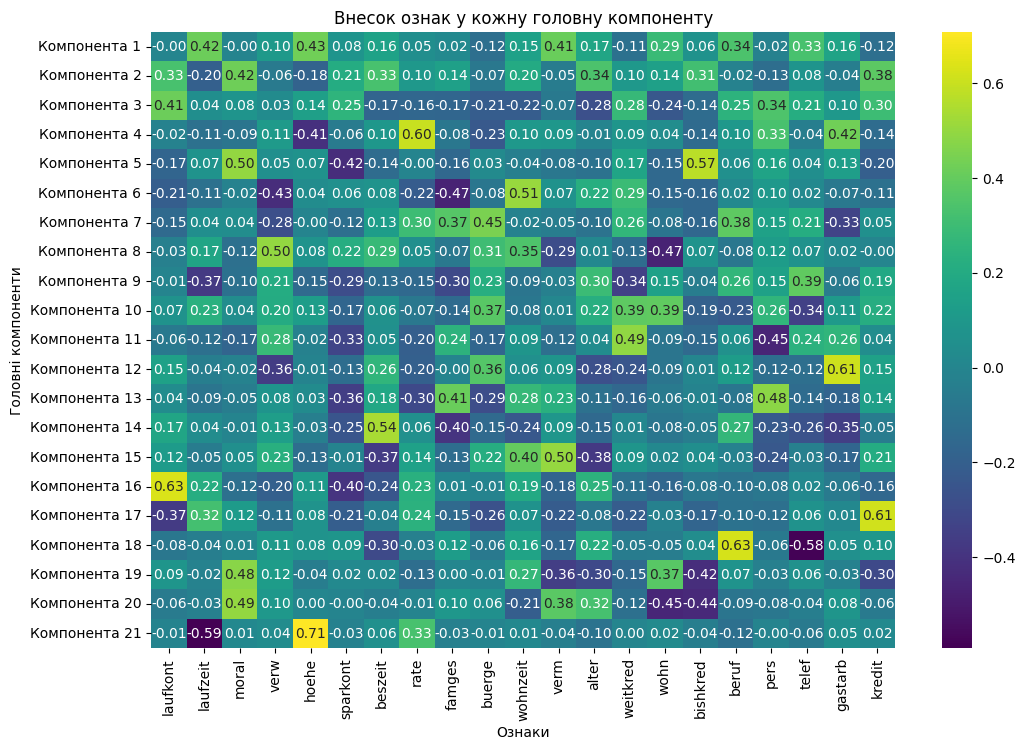

In [42]:
# Теплова карта коефіцієнтів компонент
plt.figure(figsize=(12, 8))
sns.heatmap(pca.components_, cmap='viridis', annot=True, fmt='.2f',
            xticklabels=df.columns, yticklabels=[f'Компонента {i+1}' for i in range(len(pca.components_))])
plt.title('Внесок ознак у кожну головну компоненту')
plt.xlabel('Ознаки')
plt.ylabel('Головні компоненти')
plt.show()


### Висновки
- Графік кумулятивної частки дисперсії показав, що для збереження 70% інформації потрібно щонайменше 11 компонент
- Побудований графік індивідуальної дисперсії продемонстрував, що основна частка інформації зосереджена в перших кількох компонентах, що робить їх найбільш значущими для аналізу
- Після скорочення розмірності до двох компонент, дані стали більш компактними для візуалізації, зберігши при цьому 20%. Це кіт наплакав.
- Теплова карта внеску ознак у кожну головну компоненту дозволила визначити, які змінні найбільше впливають на кожну компоненту, що важливо для інтерпретації результатів PCA